# <div align="center"><b>Programming for Data Analysis II<b></div>
### <div align="center"><b>Author: Sean Elliott<b></div>

In [1]:
# List of Imported Libraries

import pandas as pd

import numpy as np

import seaborn as sns 

import sklearn.neighbors as nei

import matplotlib.pyplot as plt 

import sklearn.model_selection as mod

import seaborn as sns

from math import sqrt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

from sklearn import linear_model

from sklearn.preprocessing import scale

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

## <div align="center"><b>Wisconsin Breast Cancer Dataset<b></div>
    
----
    
![](https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg)

This project is an indepth look at the 'Wisconsin Breast Cancer Dataset' which was produced on 15/07/1995. It is a multivariate dataset with 699 instances of data. There are 10 'Attributes' in the dataset which will be explored in the project below. The project must consist of the following requirements. We are required to;

• Undertake an analysis/review of the dataset and present an overview and background.

• Provide a literature review on classifiers which have been applied to the dataset and compare their performance.

• Present a statistical analysis of the dataset.

• Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.

• Compare, contrast and critique your results with reference to the literature.

• Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints.

## <div align="center"><b>Data Source<b></div>
    
Dataset location:
    
    https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

Creators:

1. Dr. William H. Wolberg, General Surgery Dept.University of Wisconsin, Clinical Sciences CenterMadison, WI 53792 
    wolberg '@' eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept. University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept. University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Donor: Nick Street


## <div align="center"><b>Dataset Information<b></div>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

According to the article on ['Multisurface method of pattern separation for medical diagnosis applied to breast cytology'](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC55130/?page=1) written by Dr William H Wolberg and Olvi L. Mangasarian "... each element of the pattern sets is comprised of various scalar observations...Each of 11 cytological characteristics of breast fine-needle aspirates reported to differ between benign and malignant samples was graded 1 to 10 at the time of sample collection. Nine characteristics were found to differ significantly between benign and malignant samples. Mathematically, these values for each sample were represented by a point in a nine-dimensional space of real variables. Benign points were separated from malignant ones by planes determined by linear programming."

## <div align="center"><b>Literature Review<b></div>

The main source of literature I have chosen to review regarding the original Wisconsin breast cancer dataset can be found [here](https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection). The analysis is called 'Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection' and it was published by Lucas Borges. In this journal the author analyses the dataset above using the J48 decision tree method and also a Bayesian Network. The author compares the two machine learning algorithms accuracy for predicting cases and the results are within. As described in the journal:

"To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses[10] and an easy-to use graphical computer program called Xcyt[11], which is capable of perform the analysis of cytological features based on a digital scan."

Each feature in the dataset is evaluated on a scale od 1 to 10, with 1 being the closes to bening and 10 being the closest to malignant. Statistical analysis showed that the 9 characteristics varied greatly between malignant and benign samples.
    
In my anaylsis my own results are in direct agreement with the literature review - in this review the author states that a table (fig.2) has been drawn up and the features of the dataset ranked from most to least useful from top to bottom. As you will see from my analysis below; Uniformity of Cell Shape/Size are the most reliable information available in the dataset, with Clump Thickness being another reliable variable. Least useful were Nuclear Chromatin and Mitoses. I have detailed what these different variables mean (and explained their relevance to the diagnosis) below.

*****
    
As part of the exploration of the dataset I read through multiple literature reviews of previous data analysis upon the dataset that I am being asked to investigate. I have detailed below the case studies that I read; the information that I took from them that was vital to my own exploration.
    
1) 'Analysis of Breast Cancer Detection Using Different Machine Learning Techniques' Mohammed, S.A., Darrab, S., Noaman, S.A., Saake, G. (2020). Analysis of Breast Cancer Detection Using Different Machine Learning Techniques. In: Tan, Y., Shi, Y., Tuba, M. (eds) Data Mining and Big Data. DMBD 2020. Communications in Computer and Information Science, vol 1234. Springer, Singapore. https://doi.org/10.1007/978-981-15-7205-0_10
    
2) 'Breast Cancer Statistics and Prediction Methodology: A Systematic Review and Analysis' Dubey, Ashutosh Kumar, et al. “Breast Cancer Statistics and Prediction Methodology: A Systematic Review and Analysis.” Asian Pacific Journal of Cancer Prevention, vol. 16, no. 10, Asian Pacific Organization for Cancer Prevention, 3 June 2015, pp. 4237–4245. Crossref, https://www.researchgate.net/publication/277602706_Breast_Cancer_Statistics_and_Prediction_Methodology_A_Systematic_Review_and_Analysis.
    
3) 'Computer-aided detection of breast cancer on the Wisconsin dataset: An artificial neural networks approach' Mohammad H. Alshayeji, Hanem Ellethy, Sa'ed Abed, Renu Gupta,'Computer-aided detection of breast cancer on the Wisconsin dataset: An artificial neural networks approach',Biomedical Signal Processing and Control, Volume 71, Part A, 2022, 103141, ISSN 1746-8094, https://doi.org/10.1016/j.bspc.2021.103141.

4) 'Breast cancer detection using artificial intelligence techniques: A systematic literature review' Ali Bou Nassif*, Manar Abu Talib, Qassim Nasir, Yaman Afadar, Omar Elgendy {anassif, mtalib, nasir, u17104387, u16104886}@sharjah.ac.ae
University of Sharjah, UAE; Artificial Intelligence in Medicine, Elsevier, Vol 127, May 2022, https://arxiv.org/ftp/arxiv/papers/2203/2203.04308.pdf
    
5) 'Classification of breast cancer using Wrapper and Naïve Bayes algorithms'I M D Maysanjaya, I M A Pradnyana and I M Putrama,
Journal of Physics: Conference Series, Volume 1040, International Conference on Mathematics and Natural Sciences (IConMNS 2017) 6–7 September 2017, Bali, Indonesia, https://iopscience.iop.org/article/10.1088/1742-6596/1040/1/012017

6) 'Different Machine Learning Algorithms for Breast Cancer Diagnosis.' Aloraini, Adel. (2012). International Journal of Artificial Intelligence & Applications. 3. 21-30. 10.5121/ijaia.2012.3603. https://www.researchgate.net/figure/the-Bayesian-Network-for-Wisconsin-breast-cancer_fig8_269671814
    
7) "Reviewing the consistency of the Naïve Bayes Classifier’s performance in medical diagnosis and prognosis problems", N. A. Fauziyyah, S. Abdullah, and S. Nurrohmah, AIP Conference Proceedings 2242, 030019 (2020) https://doi.org/10.1063/5.0007885
    
From the 7 studies above there has been a wealth of information which has informed my own investigation; focusing particularly on the machine learning aspect of the project.

In the first study: 'Analysis of Breast Cancer Detection Using Different Machine Learning Techniques' the findings have noted that Decision Tree (J48), Naïve bayes and SMO (Sequential Minimal Optimization) models were the most effective; with high percentages of accuracy achieved across the three models - Decision Tree (J48) being the most accurate with 98.20% accuracy.
    
The second study 'Breast Cancer Statistics and Prediction Methodology: A Systematic Review and Analysis' confirmed what the first had stated; this time showing that the SVM (Support Vector Machine) model was the most accurate; coming out with 97% accuracy - this study also noted that data cleansing was required before the training could be carried out due to the missing values in one of the variables.
    
Study 3 'Computer-aided detection of breast cancer on the Wisconsin dataset: An artificial neural networks approach' took a deep learning approach using ANN (Artificial Neural Networks) which produced an average accuracy of 99.85% when trained - I did not go too far off the beaten track in order to compare it with my own data; but it is something that; further down the line, deep learning will be an avenue I explore with this dataset. It also highlights a starting point for how I might proceed for further investigation with the dataset in the future.
    
Study 4 'Breast cancer detection using artificial intelligence techniques: A systematic literature review' compares a wide range of machine learning tools and tracks their accuracy. The authors used ANN as in study 3 and confirmed it's accuracy in their tests; however they also found (which I have confirmed below) that KNN is an accurate tool for data synthesis; and that Decision Tree (J48) is another viable option for accurate machine learning. This study also provides an insight into other studies that have been carried out; in particular highlighting that CNN (Convolution Neural Networks) were heavily used in different studies along with SVM.
    
Study 5 'Classification of breast cancer using Wrapper and Naïve Bayes algorithms' focuses on using Naive Bayes algorithm to predict the outcomes while also proving the accuracy of KNN and SVM. This study is slightly different however, as instead of training the machine off the whole dataset, they partition it into 3 groups, using 4, 5 and 6 groupings of variables using a program called ['Wrapper'](https://towardsdatascience.com/feature-selection-for-machine-learning-in-python-wrapper-methods-2b5e27d2db31). They then test these groups 50%/50%, 70%/30% and 80%/20% respectively. They pass these results through a confusion matrix and then subsequently find that the most accurate sample was the 80%/20% test (80% training, 20% test). In the result the authors acknowledge the accuracy of Naive Bayes and the method they used, while also stating that in future investigations they should test a wider range of algorithms.
    
Study 6 'Different Machine Learning Algorithms for Breast Cancer Diagnosis' focuses on a range of algorithms not previously discussed - Bayesian Network (of which Naive Bayes is one) Decision Tree J48, and Multilayer Neural Network. My primary focus for this article was it's use of Naive Bayes; as the Author passed the dataset through a program called [WEKA Tool](https://www.cs.waikato.ac.nz/ml/weka/) which is a wrapper tool and not something that I have explored.
    
Study 7 "Reviewing the consistency of the Naïve Bayes Classifier’s performance in medical diagnosis and prognosis problems" analyses the accuracy of the Naive Bayes classifier across both the Original dataset and the Diagnostic dataset.

    
#### Glossary of ML Acronyms

[ANN](https://www.analyticsvidhya.com/blog/2021/05/beginners-guide-to-artificial-neural-network/) - Artificial Neural Network are a computational learning system that are modeled on the workings of the human brain. 'Neural Networks are a set of algorithms that tries to recognize the patterns, relationships, and information from the data through the process which is inspired by and works like the human brain/biology.'
    
[CNN](https://en.wikipedia.org/wiki/Convolutional_neural_network) - Convolution Neural Network is a deep learning tool which is a class of ANN; most commonly applied to analyse visual imagery. CNN's are regularised versions of multilayer perceptrons (fully connected networks; ie. each neuron in one layer is fully connected to all neurons in the next layer). CNN's use relatively little pre-processing compared to other image classification algorithms; meaning that the network learns to optimise the filters through automated learning. 
      
[kNN](https://serokell.io/blog/knn-algorithm-in-ml) - 'The K-Nearest Neighbors classifier is a non-parametric supervised machine learning algorithm. It’s distance-based; it classifies objects based on their proximate neighbors’ classes. kNN is most often used for classification, but can be applied to regression problems as well'.
    
[Naïve Bayes](https://www.geeksforgeeks.org/naive-bayes-classifiers/) - 'Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.'
    
[SVM](https://en.wikipedia.org/wiki/Support_vector_machine) - Support Vector Machines are 'supervised learning models with associated learning algorithms that analyze data for classification and regression analysis... SVM's are one of the most robust prediction methods... SVM maps training examples ot points in space so as to maximise the width of the gap between the two catergories.New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.'
    
[Decision Tree (J48)](https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e) - 'J48 algorithm is one of the most widely used machine learning algorithms to examine the data categorically and continuously. The C4.5 algorithm (J48) is mostly used among many fields for classifying data for example interpreting the clinical data for the diagnosis of coronary heart disease, classifying E-governance data, and many more.... The J48 implementation of the C4.5 algorithm has many additional features including accounting for missing values, decision trees pruning, continuous attribute value ranges, derivation of rules...J48 allows classification via either decision trees or rules generated from them.'
    
[SMO](https://en.wikipedia.org/wiki/Sequential_minimal_optimization) - Sequential minimal optimization is 'an algorithm for solving the quadratic programming (QP) problem that arises during the training of support-vector machines (SVM).' 

## <div align="center"><b>What is Breast Cancer?<b></div>

[Breast cancer](#https://www.uicc.org/what-we-do/thematic-areas-work/breast-cancer?gclid=EAIaIQobChMIutzCy4Hv-wIVybHtCh0XWQfTEAAYAiAAEgK8F_D_BwE) is the most diagnsoed cancer in the world. It accounts for 1 in 4 cancer cases amoungst women and is the leading cause of death from cancer for women. There are an estimated 2.2 million new cases of cancer diagnosed in 2020, 1 in 10 of those diagnoses is breast cancer.  

![](https://www.uicc.org/sites/main/files/thumbnails/image/Breast-cancer-graph-top-cancer-per-country-new-cases-2020-female-web.png_0.png)

The dataset below contains many classifications which help doctors to correctly diagnose whether a sample is benign or malignant, and secondly what the best course of action will be for treatment. I will give a glossary of the attributes below and their meanings - ultimately this will help with my understanding of the dataset and hopefully during the Machine Learning stage it will help clarify a few things. Something to note is that each attribute is classified on a scale of 1 - 10, with 1 being the closest to benign, and 10 being the closest to malignant; barring the final attribute called 'Class' which is either '2' or '4'; '2' representing Benign and '4' meaning Malignant. The terms in the dataset are as below.

****

### <div align="center"><b> Database Terms<b></div> 
 
1) Sample Number - The Sample ID number 
 
2) Clump Thickness - Benign cells tend to be grouped in monolayers, while cancerous cells are often grouped in multilayers.
 
3) Cell Size - Cancer cells tend to vary in size and shape
 
4) Cell Shape -  Cancer cells tend to vary in shape and size
 
5) Adhesion - Normal cells tend to stick together while cancer cells tend to lose this ability, so the loss of adhesion is a sign of malignancy.

6) Single Epithelial Cell Size - If significantly enlarged may be a malignant cell.
 
7) Bare Nuclei - This is a term used for nuclei not surrounded by cytoplasm (the rest of the cell). Those are typically seen in benign tumors.
 
8) Bland Chromatin - Describes a uniform "texture" of the nucleus seen in benign cells. In cancer cells, the chromatin tends to be more coarse and to form clumps.
 
9) Normal Nucleoli - Nucleoli are small structures seen in the nucleus. In normal cells, the nucleolus is usually very small if visible at all. The nucleoli become more prominent in cancer cells, and sometimes there are multiple.
 
10) [Mitoses](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/mitotic-rate) - 'A measure of how fast cancer cells are dividing and growing.'
 
11) Class - description of data, '2' is an indicator for Benign and '4' is Malignant.

****
 
Descriptions above were taken from this [website](https://www.neuraldesigner.com/learning/examples/breast-cancer-diagnosis#:~:text=Epithelial%20cells%20that%20are%20significantly,typically%20seen%20in%20benign%20tumors.).

### <div align="center"><b>Types of Cancer<b></div>

There are several different types of cancer which fall under the umbrella of 'Breast Cancer' ranging in severity and treatability. I have detailed some of the distinctions below:

1. Ductal carcinoma in situ (DCIS) is a non-invasive or pre-invasive breast cancer, it starts inside the milk ducts.

2. Lobular carcinoma in situ (LCIS) is an area of abnormal cell growth in the lobules, the milk-producing glands at the end of breast ducts.

3. Invasive (infiltrating) breast cancer is cancer that has spread into surrounding breast tissue.

4. Inflammatory breast cancer is a rare and aggressive form of breast cancer, it grows and spreads quickly.

5. Paget disease of the nipple is a rare form of breast cancer. It starts in the breast ducts and spreads to the skin of the nipple and then to the areola.

6. Phyllodes tumor are rare breast tumors. They develop in the connective tissue (stroma) of the breast. Most are benign, but there are others that are malignant (cancer).

****

The above descriptions were taken from [this](https://www.researchgate.net/profile/Djihane-Houfani/publication/339062376_Machine_Learning_Techniques_for_Breast_Cancer_Diagnosis_Literature_Review/links/5e7a8529299bf1f3873fbf27/Machine-Learning-Techniques-for-Breast-Cancer-Diagnosis-Literature-Review.pdf) literature review.

## <div align="center"><b>Introduction to the Data<b></div>

I will now clean the dataset. We will then be able to start to disect the information, catergorise it, and deduce which data is most pertinent to the investigation we are trying to carry out.

In [2]:
#start by loading dataset and adding headers to columns for clarity
df = pd.read_csv('https://raw.githubusercontent.com/SeanE15/Programming_for_data_analysis_II/main/Dataset/breast-cancer-wisconsin.data')
df.columns = ["Sample_Number", "Clump_Thickness", "Cell_Size", "Cell_Shape","Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

In [3]:
# remove any variable which might muddy the dataset's values
df = df.dropna()

In [4]:
# check that no more NaN values are in the data set.
print(df.isnull().sum())

Sample_Number                  0
Clump_Thickness                0
Cell_Size                      0
Cell_Shape                     0
Adhesion                       0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [5]:
df['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

C:\Users\Sean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


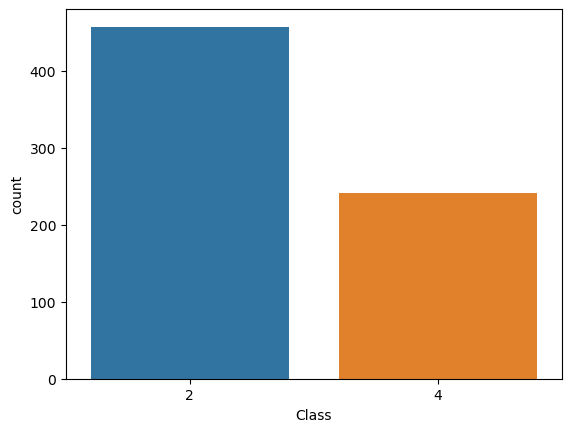

In [6]:
# We start by asking the question; from the dataset which samples are benign and which are malignant. 
# If the data set presents a '2'the sample is benign, if a '4' is presented then the samples are malignant.

sns.countplot(df.Class,label='Number of Cases')
plt.show;

 From the investigation above we can see that 457 of the samples tested were benign, while 241 cases were malignant.
 
 ----

![](https://miro.medium.com/max/720/1*pxFCmhRFTighUn88baLcSA.webp)

In [7]:
# Drop sample number column as the data is not relevant
df.drop('Sample_Number', axis=1, inplace=True)

In [8]:
# print first 5 samples in dataset and their corresponding values.
df.head().T

,0,1,2,3,4
Clump_Thickness,5,3,6,4,8
Cell_Size,4,1,8,1,10
Cell_Shape,4,1,8,1,10
Adhesion,5,1,1,3,8
Single_Epithelial_Cell_Size,7,2,3,2,7
Bare_Nuclei,10,2,4,1,10
Bland_Chromatin,3,3,3,3,9
Normal_Nucleoli,2,1,7,1,7
Mitoses,1,1,1,1,1
Class,2,2,2,2,4


<AxesSubplot:>

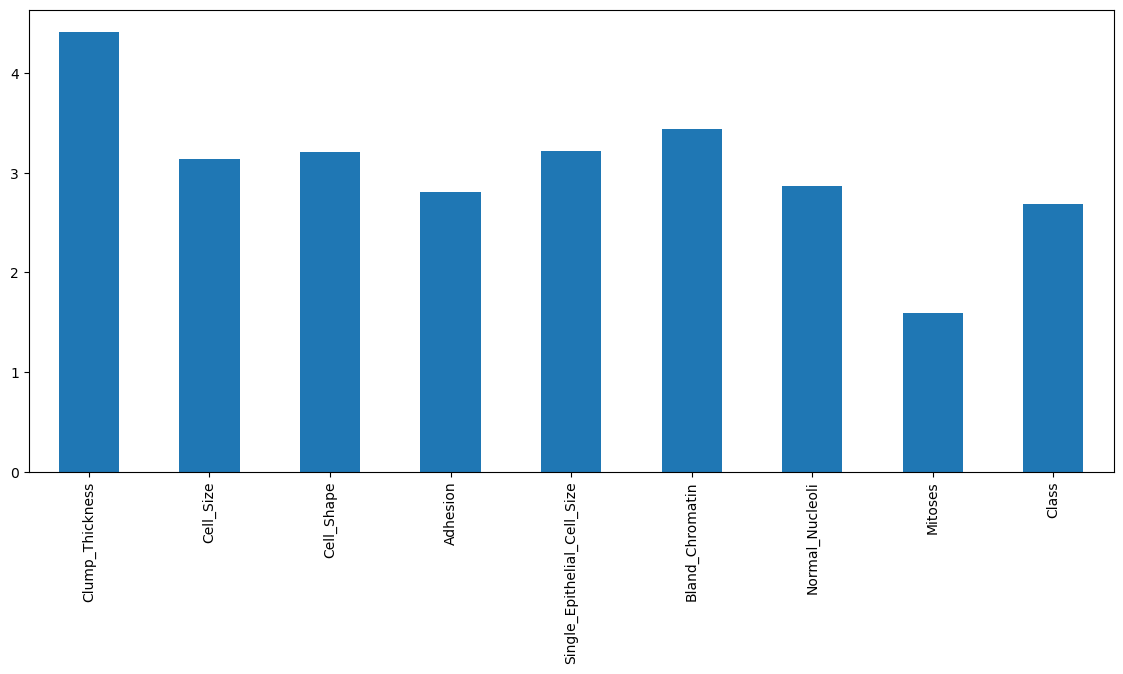

In [9]:
# create a plot to show mean value of each variable.
df_mean = df.describe().loc['mean']
df_mean.plot(kind='bar', figsize=(14,6))

In [10]:
# get the sample values of all which were diagnosed as 'Benign'
df_B = df[df['Class'] == 2]
df_B.describe()

,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.0
mean,2.951860,1.326039,1.444201,1.365427,2.120350,2.098468,1.291028,1.063457,2.0
std,1.673412,0.908561,0.998713,0.997776,0.918118,1.080701,1.059929,0.502537,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.0
75%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.0
max,8.000000,9.000000,8.000000,10.000000,10.000000,7.000000,9.000000,8.000000,2.0


In [11]:
# get the sample values of all which were diagnosed as 'Malignant'
df_M = df[df['Class'] == 4]
df_M.describe()

,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212,4.0
std,2.428849,2.719512,2.562045,3.210465,2.451606,2.273852,3.350672,2.557939,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0
25%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.0
50%,8.000000,6.000000,6.000000,5.000000,5.000000,7.000000,6.000000,1.000000,4.0
75%,10.000000,10.000000,9.000000,8.000000,6.000000,7.000000,10.000000,3.000000,4.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.0


In [12]:
# print off correlation values of dataset - will help with heatmap below
df.corr()

,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.558511,0.536176,0.350176,0.716509
Cell_Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.755824,0.722699,0.458548,0.817772
Cell_Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.736066,0.719272,0.438756,0.818794
Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.616108,0.628704,0.478975,0.682618
Bland_Chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.817772,0.818794,0.696605,0.682618,0.756732,0.712067,0.423008,1.000000


As we can see from the correlation table above, there is strong correlation between:

* Cell Shape, Cell Size and Bland Chromatin levels with a malignant tumor. 
* There is strong correlation between Bare Nuclei and Cell Shape.
* Mitoses is the weaker comparitor in the dataset for diagnosing whether a tumour is malignant or benign.

## <div align="center"><b>Analysing the Data<b></div>
    
***** 
    
I create a heatmap below using the figures from the correlation table. I have plotted the heatmap using percentages - this will help me to accurately represent how closely correlated the different sample variables are - which will yield an interesting look at what defines a sample as Malignant or Benign. 

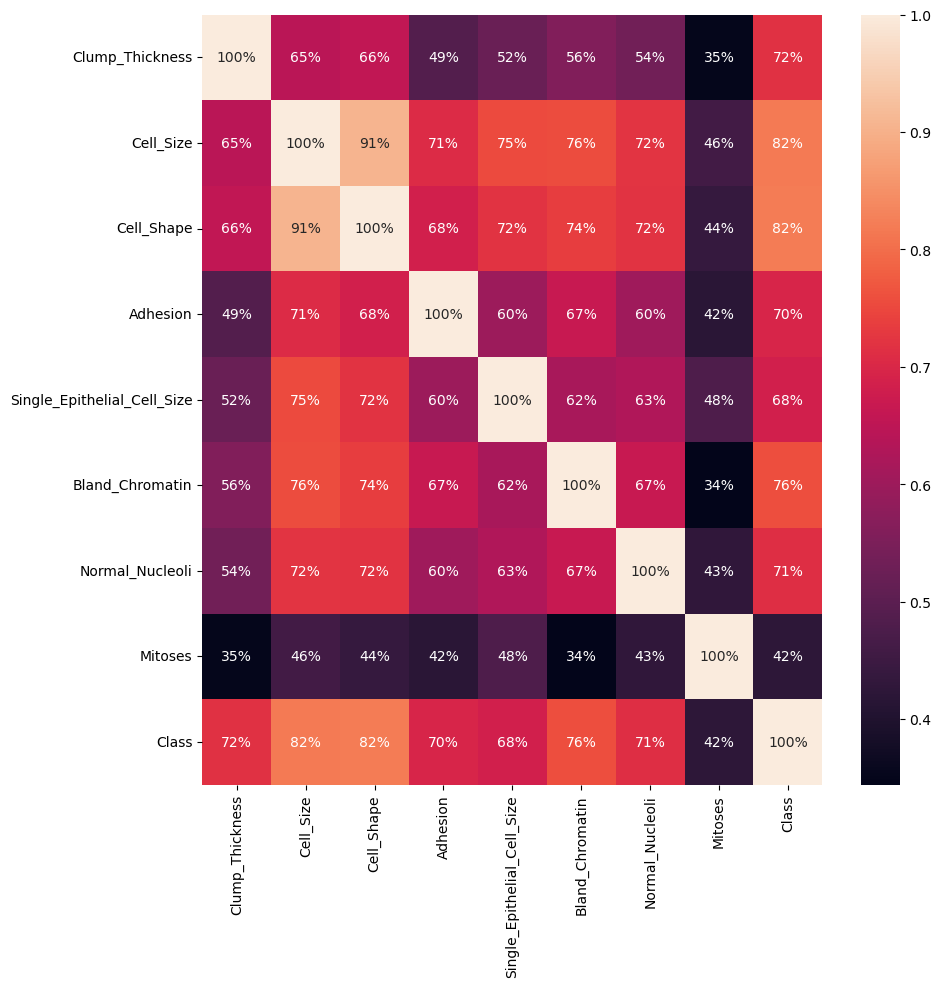

In [13]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".0%");

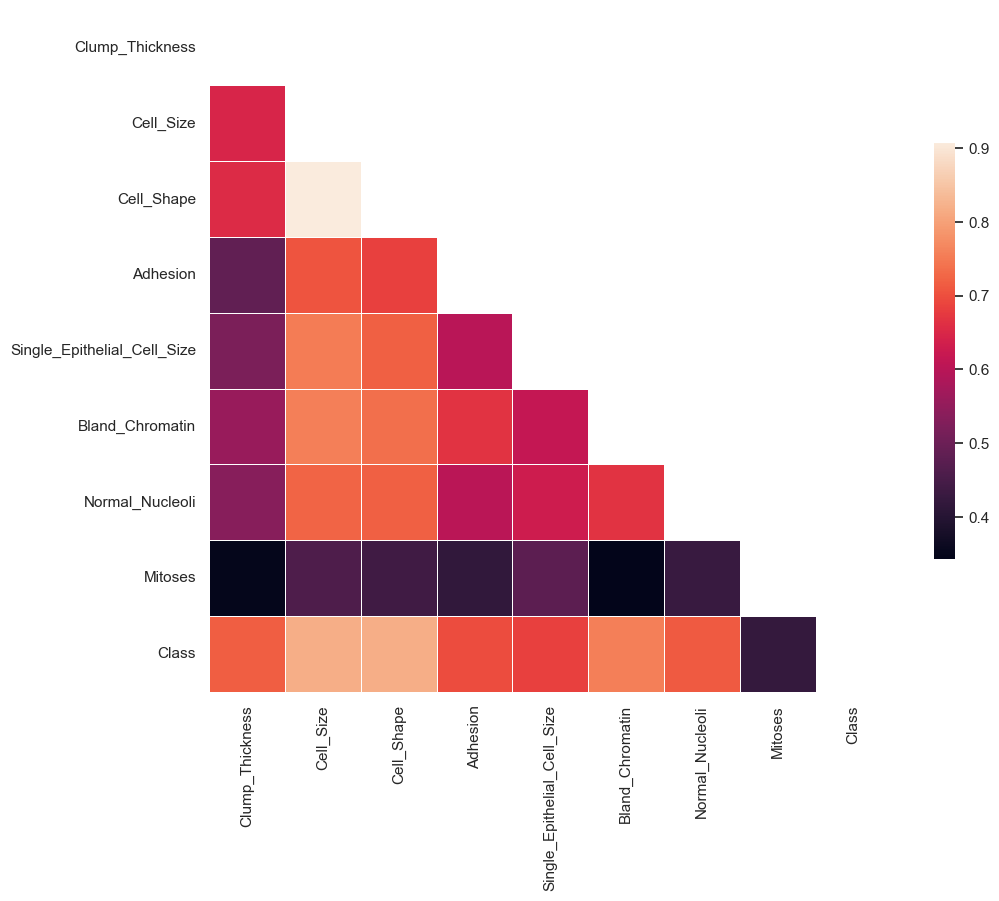

In [14]:
#Plot below is just a copy of the above heatmap but in a more presentable and more discernable way of looking at the data correlations.

sns.set_theme(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormapcmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, cbar_kws={"shrink": .6});

### <div align="center"><b>Analysis the Heatmap<b></div>

In a correlation heat map, the way it is interpreted is the higher the correlation value, the more correlated the two variables are:

1) Cell Shape, Cell Size and Clump Thickness are almost directly correlated with either a Benign or Malignant diagnosis.

2) Mitoses is strongly linked with Cell Size and Single Epithelial Cell Size.

3) Bland Chromatin is strong correlated with Class (Benign or Malignant), Cell Shape and Cell Size.

4) Mitoses has its strongest correlation with Single Epithelial Cell Size; but in general is not a good estimator for predicting whether a tumour is Malignant or Benign.

6) Bare Nuclei are also a strong indicator for accurate diagnosis of samples.
    
    
***** 
    
### <div align="center"><b>Pairplot<b></div>
    
I will now create a pairplot below and use the 'hue' of 'Bland Chromatin' to compare the results. This pairplot will analyse all of the values within the dataset and plot them against the Bland Chromatin values. Bland Chromatin levels were strongly correlated to whether a sample was Benign or Malignant and were also correlated with Cell Shape and Size; so I believe it will yield some interesting plot comparisons.

<Figure size 1000x1000 with 0 Axes>

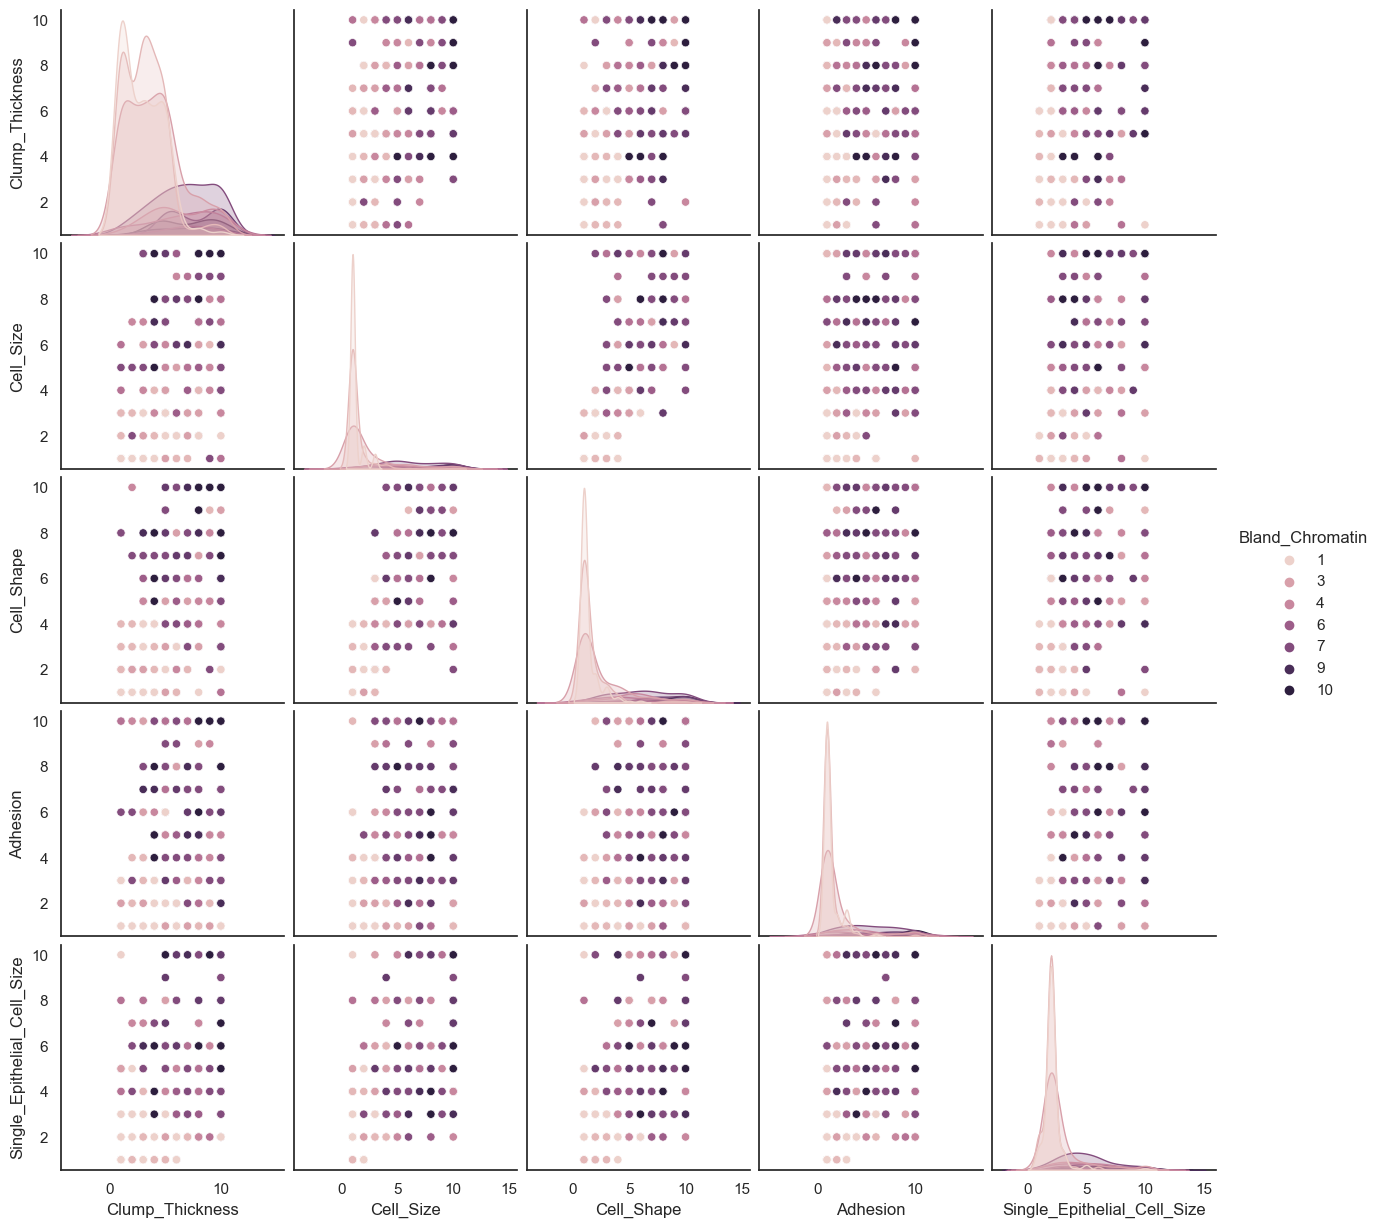

In [15]:
plt.figure(figsize =(10,10))
columns= [df.columns]
sns.pairplot(df.iloc[:, 0:7], hue='Bland_Chromatin');

### <div align="center"><b>Barplot/Catplots<b></div>
    
I will now create bar plots of the variables above and plot them against each other, using the scale from 1 - 10; 1 being the least cancerous sample (Benign) and 10 being the most cancerous (Malignant). The variable comparisons I will plot are as follows:
    
    1) Cell Size vs Cell Shape
    
    2) Adhesion vs Epithelial Cell Size
    
    3) Bare Nuclei vs Bland Chromatin
    
    4) Single Epithelial Cell Size vs Cell Size 

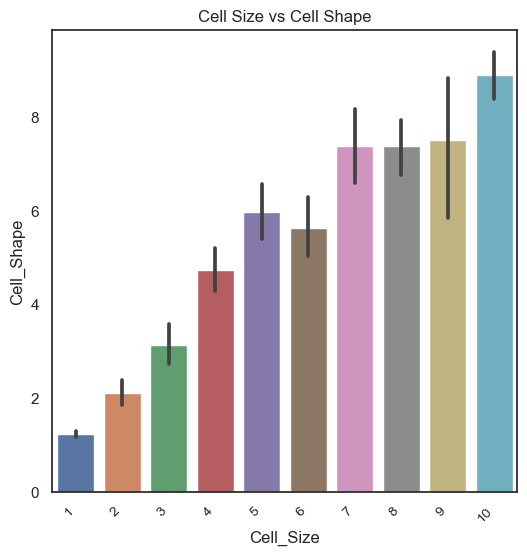

In [16]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x ='Cell_Size', y = 'Cell_Shape', data = df)
plt.xticks(rotation = 45, horizontalalignment='right',fontweight='light', fontsize='small')
plt.title('Cell Size vs Cell Shape');

The above charts Cell Shape and Cell Size - as you will see from the graph; with 10 being Malignant and 1 being Benign, we can see a very strong correlation between Cell Shape and Cell Size in accordance with Malignancy.

<Figure size 600x600 with 0 Axes>

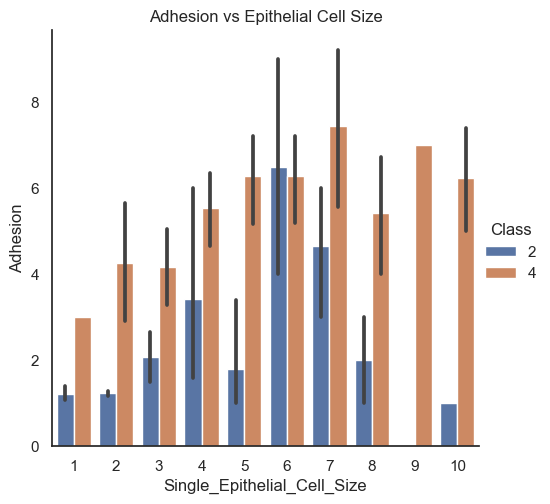

In [17]:
fig = plt.figure(figsize = (6,6))
sns.catplot(x='Single_Epithelial_Cell_Size', y='Adhesion', hue='Class', data=df, kind='bar')
plt.title('Adhesion vs Epithelial Cell Size');

The above bar chart plots Single Epithelial Cell Size against Adhesion. We can see from the plot above that as single epithelial cells grow in size adhesion drops off - this is in direct agreement with the information at the start of the project - stating that as cells become malignant they lose the potential to group together with healthy cells - meaning low adhesion levels.

<Figure size 600x600 with 0 Axes>

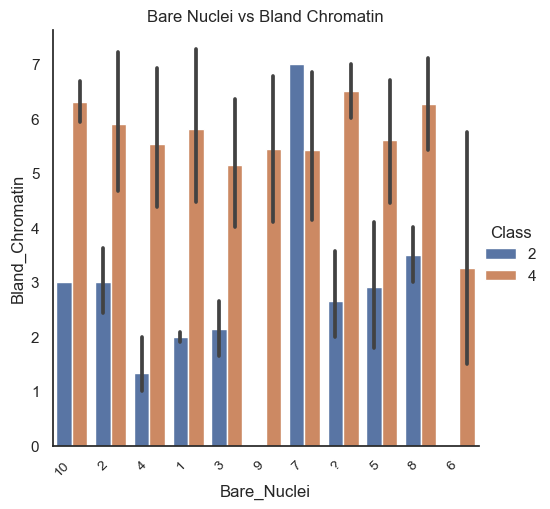

In [18]:
fig = plt.figure(figsize = (6,6))
sns.catplot(x='Bare_Nuclei', y='Bland_Chromatin', hue='Class', data=df, kind='bar')
plt.xticks(rotation = 45, horizontalalignment='right',fontweight='light', fontsize='small')
plt.title('Bare Nuclei vs Bland Chromatin');

As we can see from the above plot; Bland Chromatin levels are higher the more malignant the cells are - while bare nuclei levels tend to stay the same.

<Figure size 600x600 with 0 Axes>

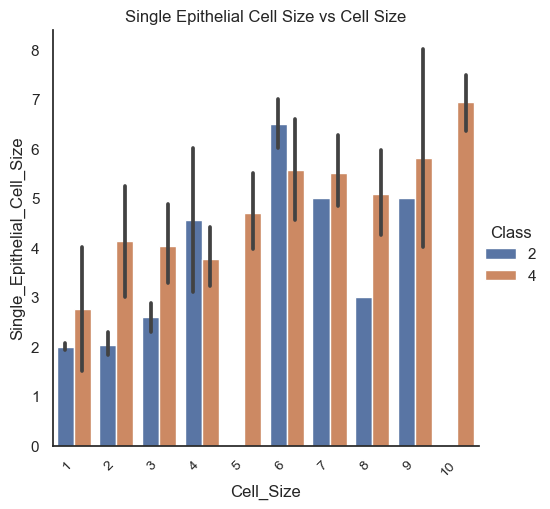

In [19]:
fig = plt.figure(figsize = (6,6))
sns.catplot(x='Cell_Size', y ='Single_Epithelial_Cell_Size', hue='Class', data=df, kind='bar')
plt.xticks(rotation = 45, horizontalalignment='right',fontweight='light', fontsize='small')
plt.title('Single Epithelial Cell Size vs Cell Size');

As cells move towards being Malignant their Cell Size increases drastically, and there is a trend that Single Epithelial Cell Size also increase incrementally to match the Cell Size. Enlarged Epithelial Cell generally are a reliable signifier for Malignant or Benign tumours.

## <div align="center"><b>Synthesizing the Data<b></div>

In order for me to choose which models to apply to the dataset I had to do a bit of digging to see which were the most suitable options. I opted for Supervised Learning models as these models map inputs and outputs and attempt to extrapolate patterns from past data onto unseen data. There are two types of Supervised learning models - regression models (which try to predict a continuous variable) or classification models (which attempt to predict a binary or multi-class variable). Below I have highlighted the pros and cons of Linear Regression - with the cons being the ultimate reason why I didn't use it in this analysis; instead opting to use KNN and Logistic Regression models along with Naive Bayes and Support Vector Classifer.

### Pros of using Linear Regression: 

* Easily explainable method 

* Interpretable results 

* Easier and faster to train 

### Cons of using Linear Regression:

* Assumes linearity between inputs and outputs

* Very sensitive to outliers (which can taint the accuracy of the prediction).

* Liable to underfit with small, high-dimensional data.

----

![](https://miro.medium.com/max/725/1*Ubge8qVlc4Xk58H1oMp4Zw.jpeg) 


## 1) Logistic Regression

### Classifier Data 

For the data synthesis section of this project I have used four seperate machine learning classifiers in order to analyse the data and predict what future data might look like; Logistic Regression (LR), K-Nearest Neighbour (KNN), Naive Bayes (NB) and Support Vector Classifier (SVC).
The first classifier I used is called ['Logistic Regression'](https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592#:~:text=Logistic%20Regression%20is%20a%20classification%20technique%20used%20in%20machine%20learning,cancer%20is%20malignant%20or%20not). Logistic Regression was chosen because I am trying to predict whether a sample is Malignant or Benign - Logistic Regression uses a logistic function to model the dependent variable. The variable is dichotomous in nature (there are only 2 possible outcomes, malignant or benign). I thought about using Linear Regression, however the Linear Regression model is problematic as 'linear regression is not suitable for classification problems as it is unbounded and the predicted value is continuous, and not probabilistic.'(3) Linear Regression is also prone to underfitting small high-dimensional data, and is sensitive to outliers; making it unsuitable for this dataset.


### What is Logistic Regression?

'It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, i.e. there could only be two possible classes (eg. either the cancer is malignant or not). As a result, this technique is used while dealing with binary data.' (3)

There are 3 different types of further classification:

1. Binomial - Where the target variable only has two outcomes (1 or 0)

2. Multinomial - Where the target variable has 3 or more outcomes  which may not have quantative significance (ie. Predicting Disease)

3. Ordinal - Where the target variables have ordered catergories (Scores from 1-5 for example)

For Logistic Regression to map the predicted values to probabilities sigmoid function is used. This function boils everything down to a value between 0 and 1. This function also has a non-negative derivative at each point and one inflection point.

Once the 'training' of the classifier has been carried out, I use a [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to summarise the performance of the prediction model. In the Confusion Matrix there are two classes - Positive(1) and Negative(0). I then also run the classification report below to find the accuracy of the prediction.

The major advantage of using Logistic Regression is that it is easy to implement and efficient to 'train'. It also performs well because the desired outcome is linearly seperable (ie. Malignant or Benign - either cancerous or not) there is no grey area for ambiguity.

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,698.0,4.416905,2.817673,1.0,2.0,4.0,6.0,10.0
Cell_Size,698.0,3.137536,3.052575,1.0,1.0,1.0,5.0,10.0
Cell_Shape,698.0,3.210602,2.972867,1.0,1.0,1.0,5.0,10.0
Adhesion,698.0,2.809456,2.856606,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,698.0,3.217765,2.215408,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,698.0,3.438395,2.440056,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,698.0,2.869628,3.055004,1.0,1.0,1.0,4.0,10.0
Mitoses,698.0,1.590258,1.716162,1.0,1.0,1.0,1.0,10.0
Class,698.0,2.690544,0.951596,2.0,2.0,2.0,4.0,4.0


In [21]:
# replace '?' character in dataset with a 5 - which is equidistant between malignant and benign samples.
df.replace('?', 5, inplace=True)
y = df['Class'].values
X = df.drop('Class', axis=1).values 

In [22]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size = 0.2, random_state=20) 
X_train.shape, X_test.shape

((558, 9), (140, 9))

In [23]:
# show breakdown of X and Y for train_test_split 

print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (558, 9)


The size of our testing "X" (input features) is (140, 9)


The size of our training "y" (output feature) is (558,)


The size of our testing "y" (output features) is (140,)


In [24]:
# https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-logistic-regression/

model = LogisticRegression(max_iter=140, random_state=None)

model.fit(X_train, y_train)

result = model.score(X_test, y_test)

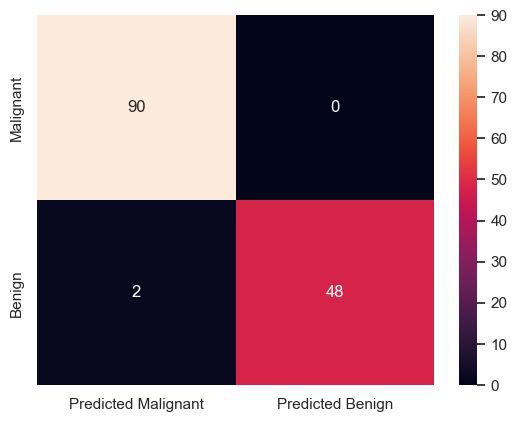

In [25]:
# we create a prediction test and a confusion matrix to see how accurately we can train the machine
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

#create pandas dataframe to show output of results. Classify results as cancerous or not and predicted healthy or not.
confusion = pd.DataFrame(cm, index=['Malignant', 'Benign'], columns=['Predicted Malignant','Predicted Benign'])

#print heatmap
sns.heatmap(confusion, annot=True);

## <div align="center"><b> Result of Data Synthesis using Logistic Regression<b></div> 

As you can see above, we trained the computer to correctly identify 375 true positive cases. The machine identified 16 false positive cases along with 16 false negative cases and 187 true negative cases in the prediction test. These results are displayed below in the Classification Report. The report below shows that the outcome of the machine learning that we have completed using Logistic Regression is 98.57% accurate - it still leaves room for improvement.

In [26]:
print(classification_report(y_test, y_pred))
print("Logistic Regression accuracy: %.4f%%" % (result*100.0))

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        90
           4       1.00      0.96      0.98        50

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

Logistic Regression accuracy: 98.5714%


## 2) K-Nearest Neighbor

I then introduced [K-Nearest Neighbor](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), another machine learning algorithm which is a supervised learner which can be used for both classification and regression. 

----

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

### What is K-Nearest Neighbor?

'KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.'(4)

K is the number of nearest neighbours to use - for classification a majority vote is used to determine which class a new observation should fall into. A larger K value means smoother curves of seperation - resulting in less complex models.

The advantage of K-Nearest Neighbour are that it is a simple supervised machine learning algorithm. I used the attached [document](https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet) to help inform my choice of machine learning models.

### a) Unscaled kNN

In [27]:
# Define knn + reinitialise (to ensure clean slate)
knn = nei.KNeighborsClassifier(n_neighbors = 3)

# Training the machine with our model
knn_model_1 = knn.fit(X_train, y_train)

result2 = knn_model_1.score(X_test, y_test)

# Print result and divide it by the x and y test scores to check accuracy
print('Accuracy for Knn-test: %.4f%%' % (result2 *100))

Accuracy for Knn-test: 96.4286%


In [28]:
y_true, y_pred = y_test, knn_model_1.predict(X_test)

# print classification report for more detailed breakdown of results
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           2       0.96      0.99      0.97        90
           4       0.98      0.92      0.95        50

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



### b) Scaled kNN

Introduce 'scaling' to improve the accuracy of the training/testing result.

In [29]:
# introduce scale in an attempt to improve accuracy in result
Xs = scale(X)

# train_test_split 
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=20)

# create knn2_model function
knn_model_2 = knn.fit(Xs_train, y_train)

scaleTr = knn_model_2.score(Xs_train, y_train)
scaleTe = knn_model_2.score(Xs_test, y_test)

# print reults for test sets and training sets 
print('k-NN score for scaled training set: %.4f%%' % (scaleTr * 100))
print('k-NN score for scaled test set: %.4f%%' % (scaleTe * 100))

# print accuracy percentage same as above
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)

k-NN score for scaled training set: 97.8495%
k-NN score for scaled test set: 94.2857%


In [30]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           2       0.95      0.97      0.96        90
           4       0.94      0.90      0.92        50

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140



## <div align="center"><b> Result of Data Synthesis using K Nearest Neighbor<b></div> 

As you can see from the above results KNN (K-Nearest Neighbor) is not quite as accurate as LR (Logistic Regression) - with KNN producing 96.42% accuracy compared to LR's 98.57% accuracy. Interestingly when I scaled the data for the training/testing the accuracy of the test stage fell massively, by 2.2% as witnessed when comparing the two classification reports. Reasons for choosing KNN are as follows:

1) KNN is a non-parametric model, where LR is a parametric model. According to the [IBM documentation](https://www.ibm.com/docs/en/db2woc?topic=procedures-statistics-parametric-nonparametric) 'Parametric statistics are based on assumptions about the distribution of population from which the sample was taken. Nonparametric statistics are not based on assumptions, that is, the data can be collected from a sample that does not follow a specific distribution.'.

2) KNN supports non-linear solutions where LR supports only linear solutions.


## 3) Naive Bayes 



### What is Naive Bayes?

[Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifiers are a family of simple 'probabilistic classifiers based on Bayes' Theorem that make strong independence assumptions between the features. Naive Bayes are among the simplest of Bayesian network models but when coupled with kernel density estimation can achieve high levels of accuracy.' Naive Bayes classifiers are very popular as they are highly scalable.

----

![](https://www.researchgate.net/publication/269671814/figure/fig8/AS:362400005017605@1463414302235/the-Bayesian-Network-for-Wisconsin-breast-cancer.png)

In [31]:
# https://medium.com/mlearning-ai/breast-cancer-naive-bayes-7f89942c05fa

#import Naive Bayes from SKlearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

pred = gnb.predict(X_test)

result3 = (accuracy_score(pred, y_test))

#print result
print("Naive Bayes test score: %.4f%%'" % (result3 * 100))
print(classification_report(y_test, pred))

Naive Bayes test score: 95.7143%'
              precision    recall  f1-score   support

           2       0.99      0.94      0.97        90
           4       0.91      0.98      0.94        50

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



## <div align="center"><b> Result of Data Synthesis using Naive Bayes<b></div> 
    
As we can see from above Naive Bayes testing and training produced an accuracy score of 95.71%; this is quite low compared to the results which the documentation that I have researched as part of this project. This is due to lack of discretization and resampling - both of which will increase the accuracy of the end result.

## 4) Support Vector Classifier

### What are Support Vector Machines and what is Support Vector Classifier?

[Support Vector Classifier](https://vitalflux.com/svm-classifier-scikit-learn-code-examples/) is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finds the optimal hyperplane that divides the data into two classes.

Using the linear nature of the dataset outcome to my advantage; with the outcomes either being Benign or Malignant, I can use an SVC to my advantage to attempt to train a machine learning algorithm to corrcetly predict whether a sample is cancerous or non-cancerous.

![](https://vitalflux.com/wp-content/uploads/2022/04/Linearly-vs-Not-linearly-separable-datasets.png)

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        90
           4       0.92      0.98      0.95        50

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

Accuracy of Support Vector Classifer: 96.42857142857143


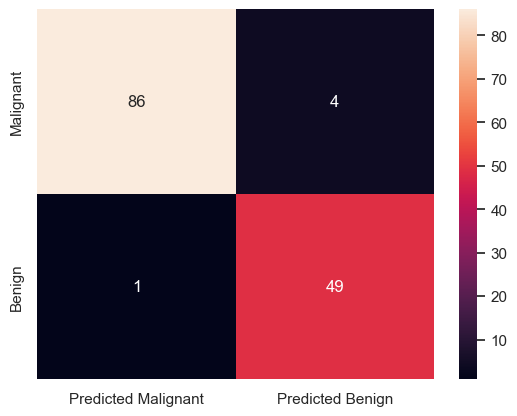

In [32]:
# https://github.com/nalamidi/Breast-Cancer-Classification-with-Support-Vector-Machine/blob/master/Breast%20Cancer%20Classification.ipynb
# https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

#start by calling function
svc_model = SVC()

#fit SVM moidel to inputs
svc_model.fit(X_train, y_train)

#create y predict for svm test
y_predict = svc_model.predict(X_test)

#store numpy array of confusion matrix in 'cm2' as confusion matrix was used above.
cm2 = np.array(confusion_matrix(y_test, y_predict, labels=[2,4]))

#create pandas dataframe to show output of results. Classify results as cancerous or not and predicted malignant or not.
confusion = pd.DataFrame(cm2, index=['Malignant', 'Benign'], columns=['Predicted Malignant','Predicted Benign'])

#print heatmap
sns.heatmap(confusion, annot=True)

result4 = (metrics.accuracy_score(y_test, y_predict))

#print classification report 
print(classification_report(y_test, y_predict))
print("Accuracy of Support Vector Classifer:", (result4 * 100))

## <div align="center"><b> Results of Classifier Testing<b></div> 

As we can see from the result below, some machine learning algorithms were more successful and accurate than others. Of the 4 classifiers that I trained; Linear Regression was the most accurate with 98.57%. SVC and KNN both come in second with 96.43% accuracy. From my work, the Naive Bayes was 95.71% accurate with KNN (scaled) being the least accurate of the algorithms; however it still had a decent accuracy rating above 94%. 

From my experiments kNN (unscaled) and SVC produced exactly the same percentage of accuracy 96.42% when tested with nearest neighbors being set to **3**. Interestingly when nearest neighbors is set to **5** - Naive Bayes and kNN (scaled) share the same accuracy rating of 95.71% - I have to do more digging to find out why this is.

Overall I am happy with the results that the Logistic Regression machine produced; 98.57% accuracy is very high - higher infact that alot of the other alogrithms that the studies I read could produce from the early stages of training (before discretization/resampling.) For further investigation I would definitely look into training a Decision Tree (J48) and Random Forest Classifier if I were to continue working on the dataset. These two aforementioned classifiers prove very accurate and reliable based upon the studies in my literature review. Artificial Neural Networks (ANN) were another popular classifer that provided reliable results, I would be interested to attempt working with one of those to see the outcome.

In [33]:
print("Logistic Regression test accuracy: %.4f%%" % (result * 100.0))
print('K-NN score (unscaled) test accuracy: %.4f%%' % (result2 * 100.0))
print("Support Vector Classifier test accuracy: %.4f%%" % (result4 * 100.0))
print("Naive Bayes test accuracy: %.4f%%" % (result3 * 100.0))
print('K-NN (scaled) test accuracy: %.4f%%' % (scaleTe * 100.0))


Logistic Regression test accuracy: 98.5714%
K-NN score (unscaled) test accuracy: 96.4286%
Support Vector Classifier test accuracy: 96.4286%
Naive Bayes test accuracy: 95.7143%
K-NN (scaled) test accuracy: 94.2857%


As we can see above I have posted the 5 results of the four classifiers I tested (one classifier; KNN with scaled and unscaled results). We can see that LR was the most accurate with 98.6% accuracy. Compared to the literature list above; my KNN and Naive Bayes accuracy were not as high as the other authors of tests in my Literature Review. 

In 'Analysis of Breast Cancer Detection Using Different Machine Learning Techniques' the results for the training and testing of Naive Bayes came out (before resampling and discretization) with a percentage of 95.99% accuracy. My own data has not been discretized; and the results came in close to the above with 95.71% - meaning that with discretization and resampling eventually my classifier could be trained to 99.12% accuracy (after 4 rounds of training as per the literature above).
Results above highlight the need for resampling to increase performance of the classifier.

In the fifth journal 'Classification of breast cancer using Wrapper and Naïve Bayes algorithms' the author cites using Wrapper with the Naive Bayes classifier - and the outcome is a yield of 99.27% accuracy. This highlights that using Deep Learning tools (which I havent covered int hsi project) we can increase the accuracy of the outcome. My own Naive Bayes test score came in at 95.71% as shown above. Coupled with the discretization, resampling and the use of a wrapper tool as evidenced in this journal; I'm sure that accuracy would increase drastically.

## <div align="center"><b> Extending the Dataset<b></div>
    
There are several ways in which we could explore the dataset in order to conduct further analysis and create a more indepth look at the process for finding a correct prognosis; and how that could be achieved.
    
* The dataset I have used has 16 missing values which were substituted with the '?' character. These have been substituted out in my project, however for the sake of accuracy these missing values need to be corrected.
    
* There is also the possiblilty to combine both the Original dataset (which I have used above) and the Diagnostic dataset - pooling both sets of data and comparing the outcomes to more accurately predict whether a sample is malginant or benign, in future increasing both accuracy and speed of diagnosis; and also providing new correlations between comminalities across the two datasets.
    
* Another avenue worth exploring is that of synthetic dataset creation using Machine Learning algorithms which would read the data available and create a predicted dataset with which we might be able to compare the original in order to spot anolmalies or consistencies - which may well end in increased accuracy in diagnosis and shorter wait times for correct diagnosis. These comparisons would also help to cut down on false positive and false negative prognoses which the machine learning algorithms throw out from time to time.
    
* The use of Deep machine learning tools; like [ANN](https://en.wikipedia.org/wiki/Artificial_neural_network)(Artificial Neural Networks) are another example of expansion that the dataset could undergo - however for deep learning to occur the dataset would need to exponentially increase in size.
    
* Discretization, Resampling and Normalisation of data are also avenues which I didn't explore in this project; but which (according to the studies in my literature review) help to provide higher levels of accuracy at the prediction stage.   
    
* Using Keras and Tensorflow to analyse the dataset in the future will be another avenue worth exploring in order to build a deeper understanding of Deep Learning algorithms.
    
* Having read an interesting [article](https://towardsdatascience.com/deep-learning-in-winonsin-breast-cancer-diagnosis-6bab13838abd); as the dataset above is very small and skewed, the dataset size needs to be increased and also balanced in order for more accurate deep learning testing to be carried out. For further investigation it would be worth delving into adding noise to the malignant data (using a normall distributed random number generator) to balance the dataset's skewness (currently it is skewed to the left.)
    
In an attempt to expand the data I will create a randomly generated dataset using a random number generator. This creates new data; which with more time I can compare with the dataset above and hopefully increase the accuracy of the classifier training stage across the board.

In [34]:
#https://medium.datadriveninvestor.com/expand-your-dataset-without-machine-learning-d82d8174ac11
# Generate randomly calculated data - a random dataset which is in comparison to the original; double in size.
from random import choice
choice_list= []

colnames = df.columns.values

for i in range(1,len(colnames)):
   namee=colnames[i]
   valueslist=df[namee].tolist()
   for _ in range(699):
      selection = choice(valueslist)
      choice_list.append(selection)
   df[namee]= pd.DataFrame(choice_list, columns=[namee])
   choice_list.clear();

C:\Users\Sean\AppData\Local\Temp\ipykernel_840\2155580136.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfnew = df.append(df, ignore_index=True)
C:\Users\Sean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


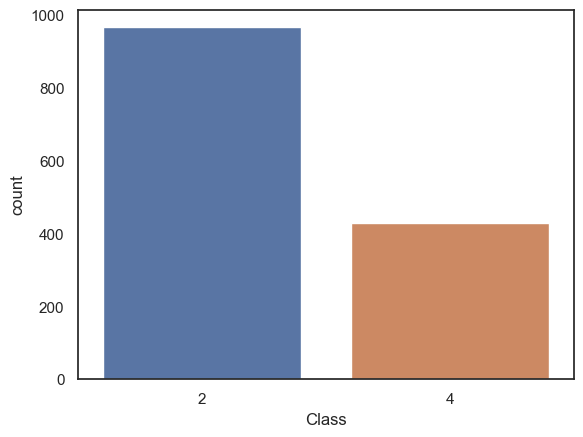

In [35]:
#create plot to show newly created dataset 'Classes'
dfnew = df.append(df, ignore_index=True)
sns.countplot(dfnew.Class,label='Number of Cases')
plt.show;

In [36]:
# show value counts for randomly generated dataset.
dfnew['Class'].value_counts()

2    966
4    430
Name: Class, dtype: int64

,B,M
0,483,215


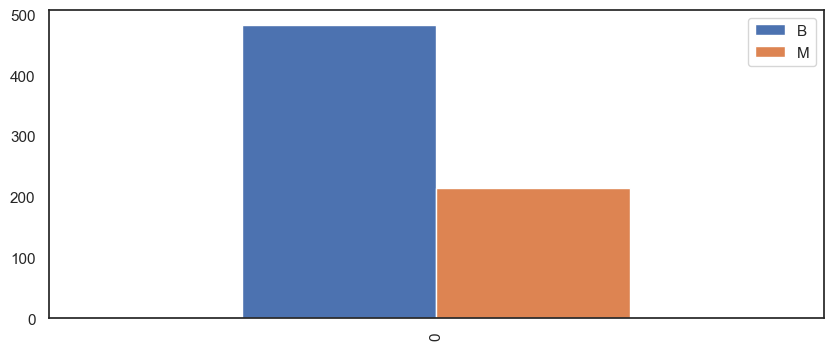

In [37]:
# attempt at training new sample results for purpose of dataset expansion 
# https://github.com/yzzhang/machine-learning/blob/master/deep_learning/Multi_Layer_Perceptron/breast-cancer-wisconsin/breast-cancer-wisconsin.ipynb

benign = df[df['Class'] == 2]
malignant= df[df['Class'] == 4]

B_M_data = {'B': [benign.shape[0]], 'M': [malignant.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))
B_M_df.head()

## <div align="center"><b> References<b></div> 

Adel Aloraini (2012) Research Gate, https://www.researchgate.net/figure/the-Bayesian-Network-for-Wisconsin-breast-cancer_fig8_269671814 (Accessed 12/12/22)

(3) Ashwin Raj (2020) Medium, https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592#:~:text=Logistic%20Regression%20is%20a%20classification%20technique%20used%20in%20machine%20learning,cancer%20is%20malignant%20or%20not (Accessed 12/12/22).

The Programming Foundation (2022) https://learn.theprogrammingfoundation.org/getting_started/intro_data_science/module4/?gclid=EAIaIQobChMIlK7v-7OG_AIVEe7tCh0RawuQEAAYASAAEgKbzPD_BwE (Accessed 10/12/22)

http://cs.wellesley.edu/~cs305/lectures/3_kNN.pdf (Accessed 17/12/22)

(4) W3Schools (1999 - 2023), W3Schools, https://www.w3schools.com/python/python_ml_knn.asp (Accessed 13/12/22)

Rohit Madan (2019) Medium, https://medium.com/@madanflies/k-nearest-neighbour-for-classification-on-breast-cancer-data-results-with-preprocessing-and-w-o-e21b0cc98a2f (Accessed 09/12/2022)

Lucas Borges (2015) Research Gate, https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection (Accessed 11/12/22)

https://www.uicc.org/what-we-do/thematic-areas-work/breast-cancer?gclid=EAIaIQobChMIutzCy4Hv-wIVybHtCh0XWQfTEAAYAiAAEgK8F_D_BwE
(Last Update: Nov, 2022) (Accessed 19/12/22)
    
Judy C. Boughey, M.D., Mayo Clinic, https://www.mayoclinic.org/diseases-conditions/breast-cancer/diagnosis-treatment/drc-20352475 (Accessed 10/12/22)

Boluwaji A.Akinnuwesi, (2020), Science Direct, https://www.sciencedirect.com/science/article/pii/S2352914820306092#bib13 (Accessed 19/12/2022)

Vikas Chaurasia, Saurabh Pal, BB Tiwari (2018) https://journals.sagepub.com/doi/pdf/10.1177/1748301818756225 (Accessed 13/12/2022)

(2022) NeuralDesigner, https://www.neuraldesigner.com/learning/examples/breast-cancer (Accessed 18/12/22)

Vishabh Goel (2018), Medium, https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3 (Acessed 19/12/22)

Shashmi Karanam (2022), Medium, https://medium.com/@shashmikaranam/exploratory-data-analysis-breast-cancer-wisconsin-diagnostic-dataset-6a3be9525cd (Accessed 13/12/22)

(2017) StackOverflow, https://stackoverflow.com/questions/37346481/how-do-i-find-and-replace-all-occurrences-in-all-files-in-visual-studio-code (Accessed 21/12/22)

Deepika Singh, (2019) Pluralsight, https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn/ (Accessed 20/12/22)

Deepika Singh, (2019) Pluralsight, https://www.pluralsight.com/guides/scikit-machine-learning/ (Accessed 20/12/22)

Machine Mantra, (2021) Youtube, Wisconsin Breast Cancer Dataset Python; How to build model in Machine Learning https://www.youtube.com/watch?v=ShxCPedWCDk (Accessed 16/12/22)

Machine Mantra, (2021) Youtube, Breast Cancer Wisconsin Data Analysis: Machine Learning Project; Exploratory Data Analysis https://www.youtube.com/watch?v=2ncx2q5GHbQ&t=634s (Accessed 16/12/22)

W H Wolberg,O L Mangasarian National Library of Medicine, (1990) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC55130/?page=4 (Accessed 17/12/22)

Marie Keating Foundation, (2022) https://www.mariekeating.ie/cancer-information/breast-cancer/finding-breast-cancer-early/ (Accessed 11/12/22)

Datacamp (2022) Datacamp https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet (Accessed 19/12/2022)

Danny Varghese, (2018) Medium, https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222#:~:text=Logistic%20Regression%20vs%20KNN%20%3A,can%20only%20output%20the%20labels (Accessed 17/12/22)
    
Djihane Houfani, Sihem Slatnia, Okba Kazar, Noureddine Zerhouni, Abdelhak Merizig, Hamza Saouli (2020) Research Gate, https://www.researchgate.net/profile/Djihane-Houfani/publication/339062376_Machine_Learning_Techniques_for_Breast_Cancer_Diagnosis_Literature_Review/links/5e7a8529299bf1f3873fbf27/Machine-Learning-Techniques-for-Breast-Cancer-Diagnosis-Literature-Review.pdf (Accessed 20/12/22)

Kumar Sanjeev Priyanka 2021 IOP Conf. Ser.: Mater. Sci. Eng. 1022 012071 https://iopscience.iop.org/article/10.1088/1757-899X/1022/1/012071/pdf (Accessed 18/12/22)
    
RAJ PARMAR, (2019) Kaggle https://www.kaggle.com/code/rajyellow46/na-ve-bayes-model-to-classify-breast-cancer-data (Accessed 11/12/22)
    
N. A. Fauziyyah, S. Abdullah and S. Nurrohmah; AIP Conference Proceedings 2242, 030019 (2020); https://doi.org/10.1063/5.0007885 Published Online: 01 June 2020 (Accessed 11/12/22)
    

Aviral Bhardwaj (2022) Medium, https://medium.com/mlearning-ai/breast-cancer-naive-bayes-7f89942c05fa (Accessed 01/01/2023)

Datacamp (2019) Datacamp https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python (Accessed 01/02/2023)
    
Jason Brownlee (2019) Machine Learning Mastery, https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/ (Accessed 03/01/23)
    
SDV (2022) SDV, https://sdv.dev/SDV/user_guides/single_table/gaussian_copula.html#gaussiancopula-model (Accessed 10/01/23)

Yuefeng Zhang, (2019) Medium, https://towardsdatascience.com/deep-learning-in-winonsin-breast-cancer-diagnosis-6bab13838abd (Accessed 09/01/2023)
    
Yuefeng Zhang, (2019) https://github.com/yzzhang/machine-learning/blob/master/deep_learning/Multi_Layer_Perceptron/breast-cancer-wisconsin/breast-cancer-wisconsin.ipynb (Accessed 09/01/23)
    

Proc. Natl. Acad. Sci. USA, Vol. 87, pp. 9193-9196, December 1990, Applied Mathematics, 'Multisurface method of pattern separation for medical diagnosis applied to breast cytology' WILLIAM H. WOLBERG AND OLVI L. MANGASARIAN

'Analysis of Breast Cancer Detection Using Different Machine Learning Techniques' Mohammed, S.A., Darrab, S., Noaman, S.A., Saake, G. (2020). Analysis of Breast Cancer Detection Using Different Machine Learning Techniques. In: Tan, Y., Shi, Y., Tuba, M. (eds) Data Mining and Big Data. DMBD 2020. Communications in Computer and Information Science, vol 1234. Springer, Singapore. https://doi.org/10.1007/978-981-15-7205-0_10

'Breast Cancer Statistics and Prediction Methodology: A Systematic Review and Analysis' Dubey, Ashutosh Kumar, et al. “Breast Cancer Statistics and Prediction Methodology: A Systematic Review and Analysis.” Asian Pacific Journal of Cancer Prevention, vol. 16, no. 10, Asian Pacific Organization for Cancer Prevention, 3 June 2015, pp. 4237–4245. Crossref, doi:10.7314/apjcp.2015.16.10.4237.

'Computer-aided detection of breast cancer on the Wisconsin dataset: An artificial neural networks approach' Mohammad H. Alshayeji, Hanem Ellethy, Sa'ed Abed, Renu Gupta,'Computer-aided detection of breast cancer on the Wisconsin dataset: An artificial neural networks approach',Biomedical Signal Processing and Control, Volume 71, Part A, 2022, 103141, ISSN 1746-8094, https://doi.org/10.1016/j.bspc.2021.103141.

'Breast cancer detection using artificial intelligence techniques: A systematic literature review' Ali Bou Nassif*, Manar Abu Talib, Qassim Nasir, Yaman Afadar, Omar Elgendy {anassif, mtalib, nasir, u17104387, u16104886}@sharjah.ac.ae University of Sharjah, UAE; Artificial Intelligence in Medicine, Elsevier, Vol 127, May 2022, https://arxiv.org/ftp/arxiv/papers/2203/2203.04308.pdf

'Classification of breast cancer using Wrapper and Naïve Bayes algorithms'I M D Maysanjaya, I M A Pradnyana and I M Putrama, Journal of Physics: Conference Series, Volume 1040, International Conference on Mathematics and Natural Sciences (IConMNS 2017) 6–7 September 2017, Bali, Indonesia, https://iopscience.iop.org/article/10.1088/1742-6596/1040/1/012017

'Different Machine Learning Algorithms for Breast Cancer Diagnosis.' Aloraini, Adel. (2012). International Journal of Artificial Intelligence & Applications. 3. 21-30. 10.5121/ijaia.2012.3603. https://www.researchgate.net/figure/the-Bayesian-Network-for-Wisconsin-breast-cancer_fig8_269671814

